In [1]:
# Import necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr

import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [3]:
# Get data and set working directory. NOTE: has been done now, shouldn't be needed again depending on the laptop you are using.
# data = et.data.get_data("colorado-flood")
# source_folder = os.path.join(et.io.HOME, 'earth-analytics')
# destination_folder = os.path.join(os.getcwd(), 'data')
# os.rename(source_folder, destination_folder)


Extracted output to /home/tristannew/earth-analytics/data/colorado-flood/.


In [3]:
# Define relative path to file
dem_pre_path = os.path.join("data", 
                            "data",
                            "colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

In [5]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())

The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)


In [6]:
# View no data value
print("The no data value is:", dtm_pre_arr.rio.nodata)

The no data value is: -3.4028235e+38


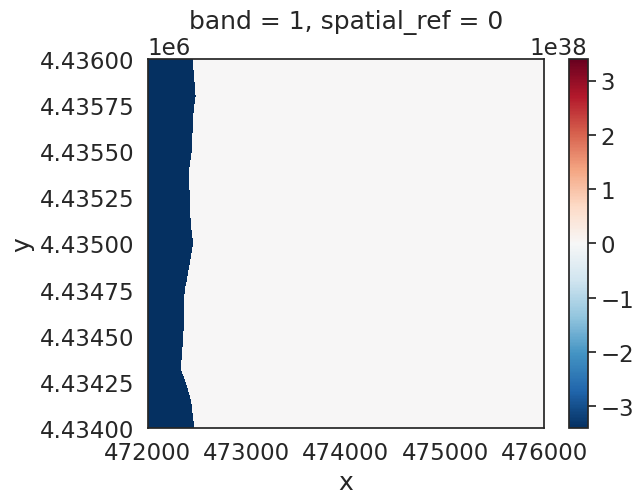

In [7]:
dtm_pre_arr.plot()
plt.show()

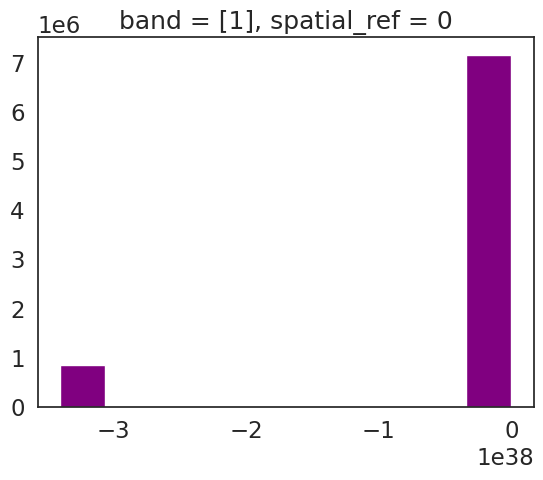

In [11]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
dtm_pre_arr.plot.hist(color="purple")
plt.show()

In [14]:
print("the minimum raster value is: ", np.min(dtm_pre_arr.values)) # they used np.nanmin and np.nanmax here but the result is the same.
print("the maximum raster value is: ", np.max(dtm_pre_arr.values))

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


In [20]:
# Notice that the shape of this object has a 1 at the beginning
# This can cause issues with plotting
dtm_pre_arr.shape

(1, 2000, 4000)

In [4]:
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data, if there were multiple bands, I guess you would avoid this.
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

In [15]:
arr = rxr.open_rasterio(dem_pre_path, masked=True)

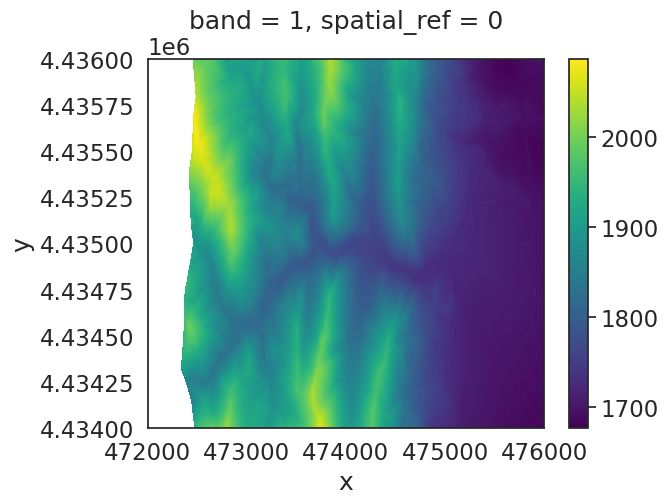

In [19]:
arr.plot()

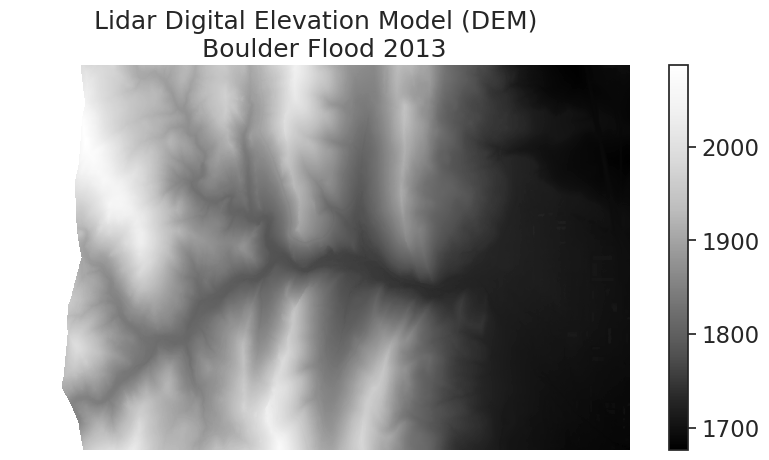

In [5]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

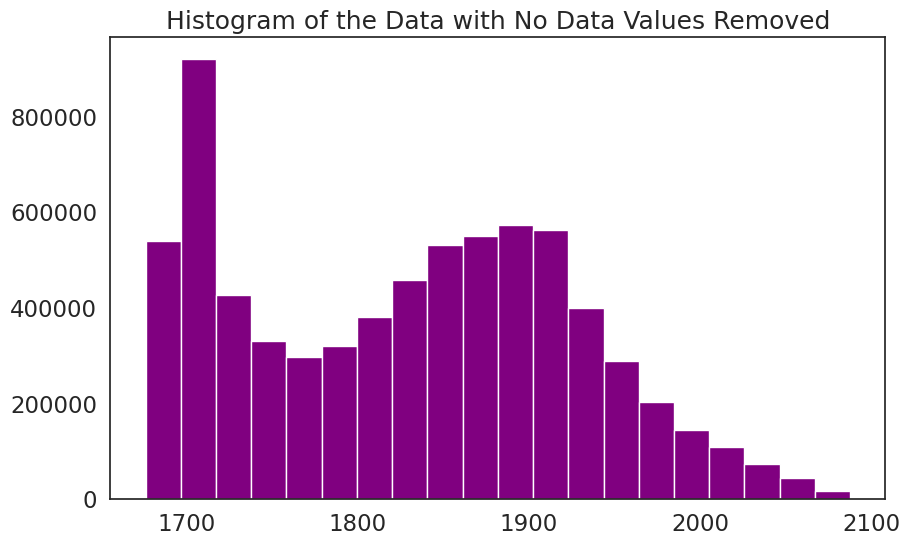

In [6]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple",
                      bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

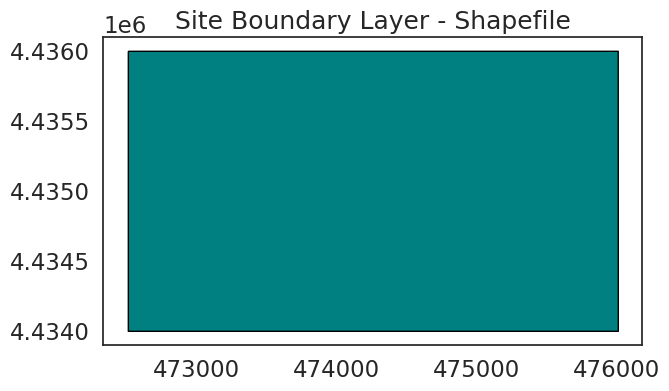

In [8]:
# Open site boundary vector layer
site_bound_path = os.path.join("data",
                               "data",
                               "colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
f, ax = plt.subplots(figsize=(8,4))
site_bound_shp.plot(color='teal',
                    edgecolor='black',
                    ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

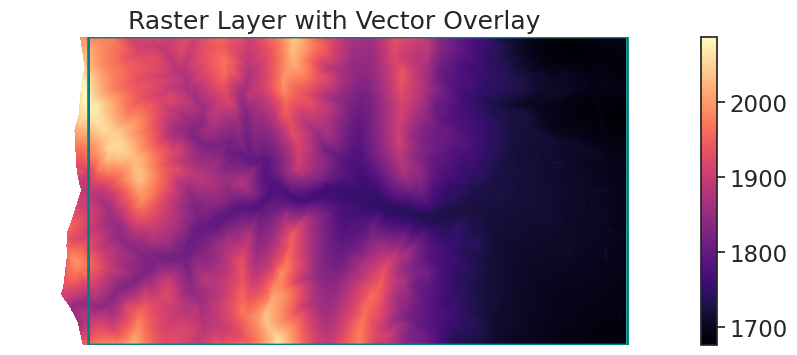

In [14]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot.imshow(cmap="magma",
                        ax=ax)
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()